# Deep Learning - Máster in Artificial Intelligence (UDC)
## Amazon Reviews Sentiment Classification using RNNs - 
Date: 24/04/2025

Authors:

Paula Biderman Mato

Celia Hermoso Soto

# Introduction
In this part of the practice, the main objective is to build and evaluate different Recurrent Neural Networks (RNNs) for text classification. The dataset used consists of Amazon customer reviews, labeled with positive or negative sentiment. The goal is to train deep learning models that can accurately predict whether a review is positive (4 or 5 stars) or negative (1 or 2 stars).

As we have seen throughout this subject, RNNs are a powerful type of deep learning architecture especially suited for sequential data such as text. They are able to capture temporal dependencies by maintaining a hidden state that is passed through time. In this practice, we use three RNN-based architectures: a simple RNN, an LSTM, and a bidirectional LSTM. These models are trained on a preprocessed version of the Amazon reviews dataset using Keras.

Unlike CNNs in image classification, text classification problems require models that understand the sequential nature of language. RNNs, and in particular LSTMs, are designed to capture such dependencies, which makes them an appropriate choice for this task. In this notebook, we compare the performance of each architecture in terms of classification accuracy.

To reuse functions and code outside a Jupyter environment, the notebook can be converted into a Python script using the nbconvert tool. This is particularly useful when we want to organize reusable components, such as data preprocessing or model definitions, into importable modules. The conversion is done with a single command: *!jupyter nbconvert --to script generateAmazonDataset.ipynb*
This command transforms the notebook into a .py file by extracting all code cells and converting markdown cells into Python comments. The resulting script can then be edited, imported into other projects, or executed directly as a standalone Python program.

In [ ]:
!jupyter nbconvert --to script generateAmazonDataset.ipynb

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from generateAmazonDataset import readData, transformData
import matplotlib.pyplot as plt

# Load dataset
We use the script provided by the instructors to load the dataset: generateAmazonDataset.ipynb. It contains two functions: readData and transformData. The readData function returns the training and test sets in raw text format, along with their binary sentiment labels. __label__1 corresponds to negative reviews (1 or 2 stars) and __label__2 to positive reviews (4 or 5 stars). Neutral reviews (3 stars) have been excluded.


In [26]:
# Read the data and parse it from the files
x_train, y_train, seqLength = readData("amazon/train_small.txt")
x_test, y_test, tmp = readData("amazon/test_small.txt")

#maxFeatures is a hyperparameter
maxFeatures = 20000

# Data Preparation and Splitting
In this step, we use a preprocessed version of the Amazon reviews dataset. The text has already been transformed into sequences of integers, where each integer corresponds to a word from a limited vocabulary of size maxFeatures, and each sequence is padded or truncated to a fixed length defined by seqLength.

After loading the training and testing sets using transformData, we split the original test set into two parts:

The first 50% (x_test_split, y_test_split) will be used as the actual test set for final evaluation of the model after training.

The remaining 50% (x_val_split, y_val_split) will be used as a validation set during training to monitor the model's performance and detect overfitting.

This ensures a clean separation between training, validation, and testing data, allowing us to reliably evaluate how well the model generalizes.


In [27]:
# Split the data into training and testing
x_train_int, y_train, x_test_int, y_test = transformData(x_train, y_train, x_test, y_test, 
maxFeatures, seqLength)

testPercentage = 0.5
testIndex = int(testPercentage * len(x_test_int))

x_test_split = x_test_int[:testIndex]
y_test_split = y_test[:testIndex]

x_val_split = x_test_int[testIndex:]
y_val_split = y_test[testIndex:]

In [28]:
# We print the number of samples in each set to confirm the data has been correctly loaded.
print(f"Samples in training set: {len(x_train_int)}")
print(f"Samples in test set: {len(x_test_split)}")
print(f"Samples in validation set: {len(x_val_split)}")

Samples in training set: 25000
Samples in test set: 12500
Samples in validation set: 12500


After preprocessing, each input review is represented as a sequence of integers of fixed length, where each integer corresponds to a token (word) from the vocabulary. These numerical sequences are now ready to be used as input for training neural networks.

# Build Model 1: SimpleRNN
The first model uses a SimpleRNN layer, which is the most basic form of recurrent neural network. It maintains a hidden state that is updated step-by-step as it processes each word in the sequence. This allows the model to learn short-term dependencies in the text. However, SimpleRNN networks can struggle to capture long-term patterns due to the vanishing gradient problem, which will be addressed in later models using LSTM.

Architecture overview:
* Embedding layer: Converts integer word indices into dense vectors of size 64 (embedding_dim). For each input review of length seqLength, the output is a 2D matrix of shape (seqLength, 64).
* SimpleRNN layer: Processes the embedded sequence one time step at a time and returns the final hidden state.
* Dense layer: A single output neuron with a sigmoid activation function, which outputs a probability between 0 and 1 — suitable for binary classification (positive or negative review).

The model is trained using the integer-encoded training data (x_train_int, y_train) and validated on a hold-out validation set (x_val_split, y_val_split). This allows monitoring of the model’s generalization performance during training.




In [9]:
embedding_dim = 64

model_rnn = keras.Sequential([
    layers.Embedding(maxFeatures, embedding_dim, input_length=seqLength),
    layers.SimpleRNN(64),
    layers.Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_rnn = model_rnn.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=5,
    batch_size=64
)

Epoch 1/5


c:\Users\paulabiderman\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5080 - loss: 0.6950 - val_accuracy: 0.5182 - val_loss: 0.6945
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5320 - loss: 0.6878 - val_accuracy: 0.4777 - val_loss: 0.6978
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.5330 - loss: 0.6821 - val_accuracy: 0.5223 - val_loss: 0.6947
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5491 - loss: 0.6636 - val_accuracy: 0.5250 - val_loss: 0.7025
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5442 - loss: 0.6566 - val_accuracy: 0.5234 - val_loss: 0.7164


The first model uses a SimpleRNN layer, implemented with a functional Keras API (Input, Model). This is the most basic type of recurrent neural network, where the hidden state is updated at each time step as the model processes the input sequence. This mechanism allows the network to learn short-term dependencies in the text. However, due to the vanishing gradient problem, SimpleRNN can struggle to retain information over long sequences, a limitation that will be addressed in later models using LSTM.

Architecture overview:
* Input layer: Accepts sequences of fixed length (seqLength) composed of integer-encoded tokens.
Embedding layer: Transforms each integer into a dense vector of size 64 (embedding_dim). The output is a 2D matrix of shape (seqLength, 64) per input.
* SimpleRNN layer: Processes the embedded sequence one time step at a time and outputs the final hidden state.
* Dense layer: A single neuron with sigmoid activation that outputs a probability between 0 and 1 for binary classification.

The model is compiled using the adam optimizer and trained with binary_crossentropy loss, suitable for binary sentiment classification. Training is performed on x_train_int and y_train, while performance is monitored on a validation split (x_val_split, y_val_split) using an EarlyStopping callback to prevent overfitting. After training, the model is evaluated on the final test set (x_test_split, y_test_split).

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Modelo SimpleRNN
inputs_rnn = Input(shape=(seqLength,))
x_rnn = Embedding(input_dim=maxFeatures, output_dim=64, mask_zero=True)(inputs_rnn)
x_rnn = SimpleRNN(64)(x_rnn)
outputs_rnn = Dense(1, activation='sigmoid')(x_rnn)
model_rnn2 = Model(inputs_rnn, outputs_rnn)

model_rnn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_rnn2 = model_rnn2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("SimpleRNN evaluation:", model_rnn2.evaluate(x_test_split, y_test_split, verbose=0))


Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.6380 - loss: 0.6136 - val_accuracy: 0.8090 - val_loss: 0.4521
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8397 - loss: 0.3898 - val_accuracy: 0.7905 - val_loss: 0.4671
Epoch 3/40
229/782 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8821 - loss: 0.3014

# Build Model 2: LSTM + Dropout
The second model builds on the limitations of SimpleRNN by using a Long Short-Term Memory (LSTM) layer, which is specifically designed to better capture long-term dependencies in sequences. LSTM cells incorporate mechanisms (gates) that control the flow of information, allowing the network to retain important features over longer time spans. This makes them particularly effective for text classification tasks.

Architecture overview:
* Embedding layer: Converts each word index into a dense vector of size embedding_dim = 64. The input shape is (seqLength, 64) per review.
* LSTM layer: Processes the sequence and returns the final hidden state, capturing both short- and long-term patterns in the text.
* Dropout layer: A regularization layer that randomly deactivates 50% of the neurons during training. This helps prevent overfitting.
* Dense output layer: A single sigmoid-activated neuron that outputs a probability for binary sentiment classification (positive vs. negative).

The model is trained on the integer-encoded reviews (x_train_int, y_train) and evaluated on a validation set (x_val_split, y_val_split). This setup allows us to monitor how well the model generalizes during training.



In [10]:
model_lstm = keras.Sequential([
    layers.Embedding(maxFeatures, embedding_dim, input_length=seqLength),
    layers.LSTM(64, return_sequences=False),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_lstm = model_lstm.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=5,
    batch_size=64
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.5134 - loss: 0.6934 - val_accuracy: 0.5206 - val_loss: 0.6923
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.5115 - loss: 0.6931 - val_accuracy: 0.5229 - val_loss: 0.6921
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.5262 - loss: 0.6919 - val_accuracy: 0.5214 - val_loss: 0.6931
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.5219 - loss: 0.6915 - val_accuracy: 0.7231 - val_loss: 0.5977
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.6081 - loss: 0.6412 - val_accuracy: 0.5235 - val_loss: 0.6920


In [17]:
from tensorflow.keras.layers import LSTM, Dropout

# Modelo LSTM
inputs_lstm = Input(shape=(seqLength,))
x_lstm = Embedding(input_dim=maxFeatures, output_dim=64, mask_zero=True)(inputs_lstm)
x_lstm = LSTM(64, recurrent_dropout=0.3)(x_lstm)
x_lstm = Dropout(0.3)(x_lstm)
outputs_lstm = Dense(1, activation='sigmoid')(x_lstm)
model_lstm2 = Model(inputs_lstm, outputs_lstm)

model_lstm2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_lstm2 = model_lstm2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("LSTM evaluation:", model_lstm2.evaluate(x_test_split, y_test_split, verbose=0))


Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.7176 - loss: 0.5590 - val_accuracy: 0.8178 - val_loss: 0.4271
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8484 - loss: 0.3664 - val_accuracy: 0.8405 - val_loss: 0.3763
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8841 - loss: 0.2938 - val_accuracy: 0.8524 - val_loss: 0.3656
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.9159 - loss: 0.2264 - val_accuracy: 0.8594 - val_loss: 0.3857
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.9335 - loss: 0.1834 - val_accuracy: 0.8534 - val_loss: 0.3862
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.9401 - loss: 0.1699 - val_accuracy: 0.8591 - val_loss: 0.4090
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.9581 - loss: 0.1246 - val_accuracy: 0.8446 - val_loss: 0.4011
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.9589 - loss: 0.1191 

# Build Model 3: Bidirectional LSTM
The third model enhances the previous LSTM-based architecture by introducing a Bidirectional wrapper around the LSTM layer. In a standard LSTM, the sequence is processed in one direction (from past to future). With a bidirectional layer, the model processes the input sequence in both directions—forward and backward—capturing context from both past and future tokens simultaneously. This is especially useful in text classification tasks, where both left and right context contribute to the meaning of a sentence.

Architecture overview:
* Embedding layer: Maps each word index to a dense vector of embedding_dim = 64, creating a matrix representation for each input review.
* Bidirectional LSTM layer: Wraps the standard LSTM to learn from both directions in the sequence, improving the model's ability to understand context.
* Dense output layer: A single neuron with sigmoid activation to predict the binary class (positive or negative sentiment).

This model is trained using the preprocessed training data (x_train_int, y_train) and validated on a separate validation set (x_val_split, y_val_split). The bidirectional nature of the LSTM often results in better accuracy, although it increases the computational cost.

In [11]:
model_bilstm = keras.Sequential([
    layers.Embedding(maxFeatures, embedding_dim, input_length=seqLength),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(1, activation='sigmoid')
])

model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bilstm = model_bilstm.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=5,
    batch_size=64
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.7437 - loss: 0.4938 - val_accuracy: 0.8730 - val_loss: 0.3020
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.9265 - loss: 0.1983 - val_accuracy: 0.8794 - val_loss: 0.3163
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.9549 - loss: 0.1286 - val_accuracy: 0.8725 - val_loss: 0.3230
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.9693 - loss: 0.0924 - val_accuracy: 0.8660 - val_loss: 0.3441
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 88s 225ms/step - accuracy: 0.9734 - loss: 0.0802 - val_accuracy: 0.8712 - val_loss: 0.4095


In [18]:
from tensorflow.keras.layers import Bidirectional

# Modelo Bidirectional LSTM
inputs_bilstm = Input(shape=(seqLength,))
x_bilstm = Embedding(input_dim=maxFeatures, output_dim=64, mask_zero=True)(inputs_bilstm)
x_bilstm = Bidirectional(LSTM(64))(x_bilstm)
outputs_bilstm = Dense(1, activation='sigmoid')(x_bilstm)
model_bilstm2 = Model(inputs_bilstm, outputs_bilstm)

model_bilstm2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bilstm2 = model_bilstm2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("Bidirectional LSTM evaluation:", model_bilstm2.evaluate(x_test_split, y_test_split, verbose=0))


Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.7883 - loss: 0.4293 - val_accuracy: 0.8849 - val_loss: 0.2771
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9391 - loss: 0.1668 - val_accuracy: 0.8658 - val_loss: 0.3215
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.9703 - loss: 0.0928 - val_accuracy: 0.8682 - val_loss: 0.4126
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.9848 - loss: 0.0477 - val_accuracy: 0.8639 - val_loss: 0.4510
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.9926 - loss: 0.0250 - val_accuracy: 0.8693 - val_loss: 0.5013
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.9954 - loss: 0.0155 - val_accuracy: 0.8615 - val_loss: 0.6290
Bidirectional LSTM evaluation: [0.26997026801109314, 0.8895999789237976]


# Visualization of training results
We plot the accuracy of each model over the training epochs to visually compare their performance. This helps to detect underfitting, overfitting, and general learning trends.

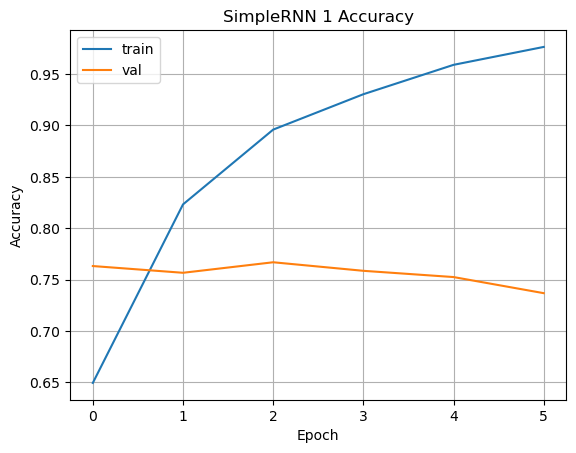

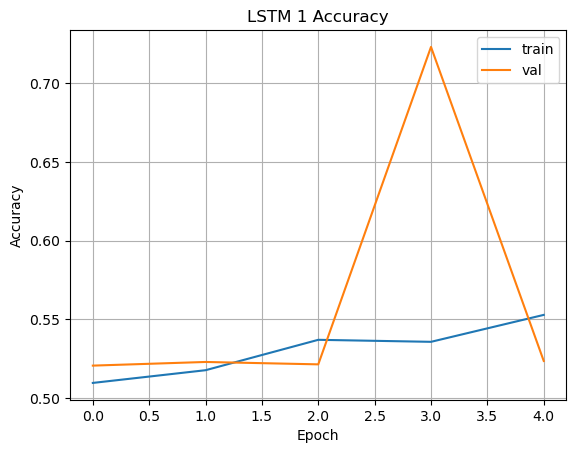

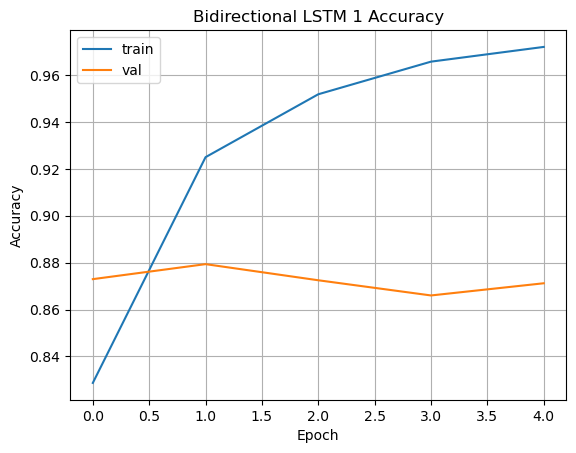

NameError: name 'history_rnn2' is not defined

In [ ]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history_rnn, 'SimpleRNN 1 Accuracy')
plot_history(history_lstm, 'LSTM 1 Accuracy')
plot_history(history_bilstm, 'Bidirectional LSTM 1 Accuracy')
plot_history(history_rnn2, 'SimpleRNN 2 Accuracy')
plot_history(history_lstm2, 'LSTM 2 Accuracy')
plot_history(history_bilstm2, 'Bidirectional LSTM 2 Accuracy')

# Final evaluation and conclusions
In this section we show the final results on the test set. The main metric used is accuracy. We compare the performance of each architecture to assess which one generalizes better.

After training and validating each model, we now evaluate their performance on the final test set (`x_test_split`, `y_test_split`). This evaluation provides an unbiased estimate of how well each model generalizes to completely unseen data.

The reported accuracy values will help compare the effectiveness of each architecture:
* `SimpleRNN`: baseline performance using a basic recurrent unit.
* `LSTM`: expected to perform better thanks to its ability to capture long-term dependencies.
* `Bidirectional LSTM`: potentially best results due to its access to both past and future context.

The goal is to identify which model achieves the highest test accuracy and assess the trade-off between performance and model complexity.


In [ ]:
print("Final Evaluation:")
print("SimpleRNN 1:", model_rnn.evaluate(x_test_split, y_test_split, verbose=0))
print("LSTM 1", model_lstm.evaluate(x_test_split, y_test_split, verbose=0))
print("Bidirectional LSTM 1:", model_bilstm.evaluate(x_test_split, y_test_split, verbose=0))
print("SimpleRNN 2:", model_rnn2.evaluate(x_test_split, y_test_split, verbose=0))
print("LSTM 2", model_lstm2.evaluate(x_test_split, y_test_split, verbose=0))
print("Bidirectional LSTM 2:", model_bilstm2.evaluate(x_test_split, y_test_split, verbose=0))

Final Evaluation:
SimpleRNN: [0.7149720191955566, 0.5122399926185608]
LSTM: [0.6936721205711365, 0.5125600099563599]
Bidirectional LSTM: [0.39305296540260315, 0.875760018825531]


# Regularization Techniques in RNNs
In order to improve the generalization ability of recurrent neural networks and mitigate overfitting, we explore various weight regularization techniques applied to SIMPLE RNN and LSTM-based models. While dropout is a common approach for regularization, its performance in previous experiments did not significantly reduce overfitting. Therefore, we now focus on alternative methods: L1, L2, and L1_L2 (Elastic Net) regularization.

These techniques work by penalizing large weights during training, thus encouraging the model to learn simpler, more robust representations:
* L1 regularization: Encourages sparsity by adding the sum of absolute values of the weights to the loss function. It tends to push less useful weights to zero.
* L2 regularization: Penalizes large weights by adding the sum of squared weights to the loss. It promotes smaller, more uniformly distributed weights.
* L1_L2 regularization: Combines both penalties to benefit from sparsity and small weight magnitudes simultaneously.

Each model below uses the same architecture and training setup, differing only in the applied regularization technique.

In [ ]:
from tensorflow.keras import regularizers

## SimpleRNN with L1 Regularization
This model applies L1 regularization to both the input and recurrent connections of the SimpleRNN layer. L1 regularization helps reduce model complexity by zeroing out less important weights, which can lead to sparser representations.

* Regularizer used: regularizers.l1(0.01)
* Expected effect: May reduce overfitting, but might slightly limit model capacity due to increased sparsity.
* Evaluation: Compared to the base model, performance is analyzed on the validation and test sets

In [ ]:
l1_reg = regularizers.l1(0.01)

inputs_rnn_l1 = Input(shape=(seqLength,))
x_rnn_l1 = Embedding(maxFeatures, 64, mask_zero=True)(inputs_rnn_l1)
x_rnn_l1 = SimpleRNN(64, kernel_regularizer=l1_reg, recurrent_regularizer=l1_reg)(x_rnn_l1)
output_rnn_l1 = Dense(1, activation='sigmoid')(x_rnn_l1)

model_rnn_l1 = Model(inputs_rnn_l1, output_rnn_l1)
model_rnn_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_rnn_l1 = model_rnn_l1.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("SimpleRNN + L1 evaluation:", model_rnn_l1.evaluate(x_test_split, y_test_split, verbose=0))

## SimpleRNN with L2 Regularization
Here, we apply L2 regularization (also known as ridge regularization) to the SimpleRNN layer. L2 penalizes large weights, encouraging the network to maintain small and stable values throughout training.

* Regularizer used: regularizers.l2(0.01)
* Expected effect: Leads to smoother convergence and improved generalization, especially on noisy data.
* Comparison goal: Analyze whether L2 outperforms L1 in maintaining performance while reducing overfitting.

In [ ]:
l2_reg = regularizers.l2(0.01)

inputs_rnn_l2 = Input(shape=(seqLength,))
x_rnn_l2 = Embedding(maxFeatures, 64, mask_zero=True)(inputs_rnn_l2)
x_rnn_l2 = SimpleRNN(64, kernel_regularizer=l2_reg, recurrent_regularizer=l2_reg)(x_rnn_l2)
output_rnn_l2 = Dense(1, activation='sigmoid')(x_rnn_l2)

model_rnn_l2 = Model(inputs_rnn_l2, output_rnn_l2)
model_rnn_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_rnn_l2 = model_rnn_l2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("SimpleRNN + L2 evaluation:", model_rnn_l2.evaluate(x_test_split, y_test_split, verbose=0))

## SimpleRNN with L1_L2 Regularization
This final variant combines both L1 and L2 regularization techniques through the l1_l2 penalty. It attempts to benefit from the sparsity of L1 and the weight smoothing of L2 simultaneously.

* Regularizer used: regularizers.l1_l2(l1=0.01, l2=0.01)
* Expected effect: Strikes a balance between pruning irrelevant weights and regularizing important ones.
* Evaluation: This model is often a good compromise when neither L1 nor L2 alone gives optimal results.

In [ ]:
l1_l2_reg = regularizers.l1_l2(l1=0.01, l2=0.01)

inputs_rnn_l1l2 = Input(shape=(seqLength,))
x_rnn_l1l2 = Embedding(maxFeatures, 64, mask_zero=True)(inputs_rnn_l1l2)
x_rnn_l1l2 = SimpleRNN(64, kernel_regularizer=l1_l2_reg, recurrent_regularizer=l1_l2_reg)(x_rnn_l1l2)
output_rnn_l1l2 = Dense(1, activation='sigmoid')(x_rnn_l1l2)

model_rnn_l1l2 = Model(inputs_rnn_l1l2, output_rnn_l1l2)
model_rnn_l1l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_rnn_l1l2 = model_rnn_l1l2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("SimpleRNN + L1_L2 evaluation:", model_rnn_l1l2.evaluate(x_test_split, y_test_split, verbose=0))

## LSTM with L1 Regularization
In this model, we apply L1 regularization to both the input and recurrent connections of the LSTM layer. This encourages the model to zero out less relevant weights, promoting sparsity in the learned representation.

* Regularizer: regularizers.l1(0.01)
* Expected effect: May reduce overfitting by simplifying the model, though sometimes at the cost of slightly reduced performance.
* Training: Same number of epochs and validation strategy as in previous models.

In [ ]:
l1_reg = regularizers.l1(0.01)

inputs_l1 = Input(shape=(seqLength,))
x_l1 = Embedding(input_dim=maxFeatures, output_dim=64, mask_zero=True)(inputs_l1)
x_l1 = LSTM(64, kernel_regularizer=l1_reg, recurrent_regularizer=l1_reg)(x_l1)
output_l1 = Dense(1, activation='sigmoid')(x_l1)

model_l1 = Model(inputs_l1, output_l1)
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_l1 = model_l1.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("LSTM + L1 evaluation:", model_l1.evaluate(x_test_split, y_test_split, verbose=0))

## LSTM with L2 Regularization
Here, we apply L2 regularization, also known as ridge regularization, which penalizes large weight values but keeps them close to zero rather than eliminating them entirely. It leads to smoother and more stable weight distributions.

* Regularizer: regularizers.l2(0.01)
* Expected effect: Can improve generalization without heavily impacting the model's capacity.
* Training setup: Identical to the L1 version for a fair comparison.

In [ ]:
l2_reg = regularizers.l2(0.01)

inputs_l2 = Input(shape=(seqLength,))
x_l2 = Embedding(input_dim=maxFeatures, output_dim=64, mask_zero=True)(inputs_l2)
x_l2 = LSTM(64, kernel_regularizer=l2_reg, recurrent_regularizer=l2_reg)(x_l2)
output_l2 = Dense(1, activation='sigmoid')(x_l2)

model_l2 = Model(inputs_l2, output_l2)
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_l2 = model_l2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("LSTM + L2 evaluation:", model_l2.evaluate(x_test_split, y_test_split, verbose=0))

## LSTM with L1_L2 Regularization
In this final model, we combine L1 and L2 penalties in a single L1_L2 regularizer. This hybrid approach allows us to benefit from the sparsity-inducing behavior of L1 and the stabilizing effect of L2.

* Regularizer: regularizers.l1_l2(l1=0.01, l2=0.01)
* Expected effect: Offers a balance between weight pruning and smooth generalization.
* Use case: Often preferred when neither L1 nor L2 alone yields optimal results.

In [ ]:
l1_l2_reg = regularizers.l1_l2(l1=0.01, l2=0.01)

inputs_l1l2 = Input(shape=(seqLength,))
x_l1l2 = Embedding(input_dim=maxFeatures, output_dim=64, mask_zero=True)(inputs_l1l2)
x_l1l2 = LSTM(64, kernel_regularizer=l1_l2_reg, recurrent_regularizer=l1_l2_reg)(x_l1l2)
output_l1l2 = Dense(1, activation='sigmoid')(x_l1l2)

model_l1l2 = Model(inputs_l1l2, output_l1l2)
model_l1l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_l1l2 = model_l1l2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("LSTM + L1_L2 evaluation:", model_l1l2.evaluate(x_test_split, y_test_split, verbose=0))

In [ ]:
def plot_history_comparison(histories, labels):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=f"{label} (val acc)")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.title("Validation Accuracy Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history_comparison(
    [history_l1, history_l2, history_l1l2],
    ["L1", "L2", "L1_L2"]
)
